In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
airline = pd.read_excel(r'C:\Users\Kashi\Downloads\Airlines.xlsx',index_col ='Month',parse_dates = True)
airline.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


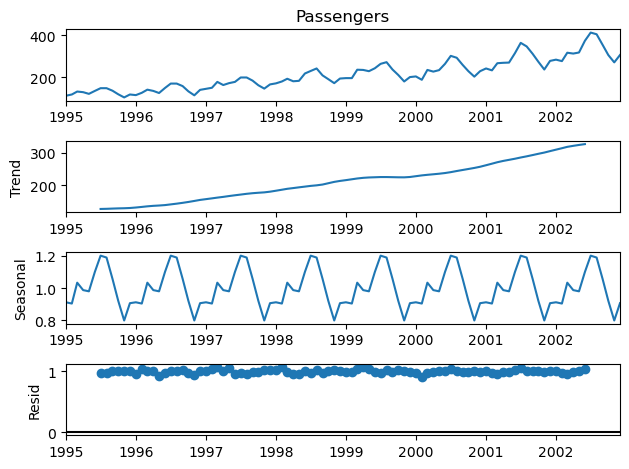

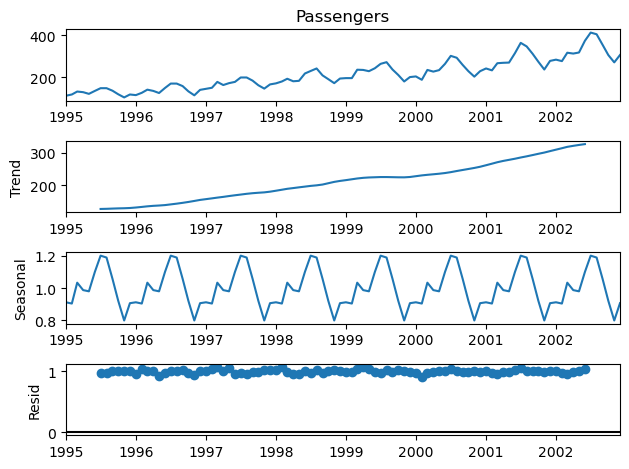

In [3]:
# ETS Decomposition
result = seasonal_decompose(airline["Passengers"],
                            model ='multiplicative')

# ETS plot
result.plot()

In [4]:
!pip install pmdarima

  Using cached pmdarima-2.0.4-cp39-cp39-win_amd64.whl (614 kB)


In [5]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
stepwise_fit = auto_arima(airline['Passengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise

# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=619.334, Time=0.39 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=622.012, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=615.965, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=616.628, Time=0.12 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=618.192, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=617.814, Time=0.25 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=617.881, Time=0.21 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=616.531, Time=0.14 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.92 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=618.221, Time=0.08 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=617.862, Time=0.11 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=617.462, Time=0.14 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=616.076, Time=0.08 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=619.394, Time=0.28 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -304.983
Date:                            Fri, 29 Dec 2023   AIC                            615.965
Time:                                    22:09:10   BIC                            623.222
Sample:                                01-01-1995   HQIC                           618.881
                                     - 12-01-2002                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2250      0.099     -2.276      0.023      -0.419      -0.031
ar.S.L12      -0.2274      0.089     -2.548      0.011      -0.402      -0.052
sigma2        90.2700     14.667      6.155      0.000      61.524     119.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.23
Prob(Q):                              0.97   Prob(JB):                         0.33
Heteroskedasticity (H):               1.77   Skew:                             0.39
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
train = airline.iloc[:len(airline)-12]
test = airline.iloc[len(airline)-12:] # set one year(12 months) for testing

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Passengers'],
                order = (0, 1, 1),
                seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   84
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -261.892
Date:                            Fri, 29 Dec 2023   AIC                            533.783
Time:                                    22:09:24   BIC                            545.096
Sample:                                01-01-1995   HQIC                           538.282
                                     - 12-01-2001                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2148      0.112     -1.915      0.056      -0.435       0.005
ar.S.L12      -1.2045      0.876     -1.375      0.169      -2.922       0.513
ar.S.L24      -0.3644      0.246     -1.479      0.139      -0.847       0.118
ma.S.L12       0.9993    152.215      0.007      0.995    -297.337     299.336
sigma2        83.4077   1.26e+04      0.007      0.995   -2.47e+04    2.48e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.45
Prob(Q):                              1.00   Prob(JB):                         0.29
Heteroskedasticity (H):               2.52   Skew:                             0.44
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

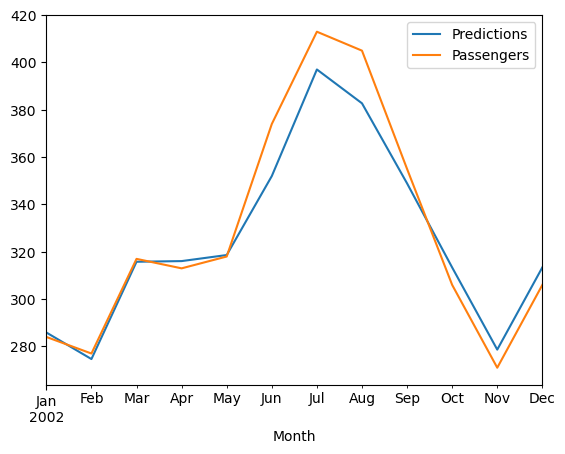

In [8]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

# plot predictions and actual values
predictions.plot(legend = True)
test['Passengers'].plot(legend = True)